## 기본 설정

- 필수 모듈 불러오기
- 그래프 출력 관련 기본 설정 지정

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# 어레이 데이터를 csv 파일로 저장하기
def save_data(fileName, arrayName, header=''):
    np.savetxt(fileName, arrayName, delimiter=',', header=header, comments='')

### 과제 3

A. 사진을 낮과 밤으로 분류하는 로지스틱 회귀 모델을 구현하라.

B. 사진을 낮과 밤, 실내와 실외로 분류하는 다중 레이블 분류 모델을 두 개의 로지스틱 회귀 모델을 이용하여 구현하라.

C. 과제 1에서 구현한 자신의 알고리즘과 사이킷런에서 제공하는 LogisticRegression 모델의 성능을 비교하라. 

단, 모델 구현에 필요한 사진을 직접 구해야 한다. 최소 100장 이상의 사진 활용해야 한다.

In [1]:
!git clone https://github.com/hyoungteak/Assignment.git

Cloning into 'Assignment'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 126 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (126/126), 9.97 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.


원래는 구글드라이브에서 나만 사용할 수 있도록 가져왔지만, 깃허브를 만들고 이미지 100개를 넣어놨었다.

깃허브에서 제대로 가져왔는지 "inside_day1.jpg"를 출력해서 확인해보자.

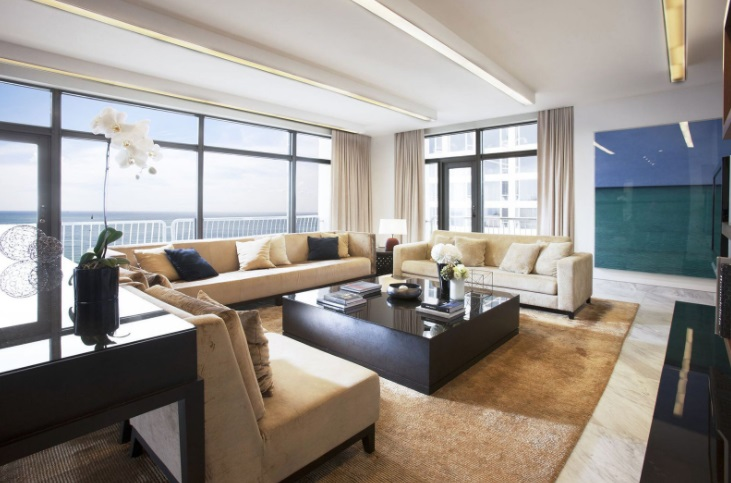

In [3]:
from IPython.display import Image
Image('/content/Assignment/Machine Learning Assignment 4/Daynight picture/inside_day1.jpg')

잘 가져온 것 같다. 하지만 사진이 너무 크니 데이터를 전처리해보자.

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv

def createFileList(myDir, format='.jpg'):
  fileList = []
  print(myDir)
  for root, dirs, files in os.walk(myDir, topdown=False):
      for name in files:
          if name.endswith(format):
              fullName = os.path.join(root, name)
              fileList.append(fullName)
  return fileList

myFileList = createFileList('/gdrive/My Drive/practice4/')
file_name = os.listdir('/gdrive/My Drive/practice4/')

for file in myFileList:
    img_file = Image.open(file)

    img_file = img_file.resize((100,100))

    img_grey = img_file.convert('L')

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()

    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/gdrive/My Drive/practice4/


In [ ]:
import pandas as pd
daynight = pd.read_csv('/content/img_pixels.csv', header=None)

우선 사진 100개를 100X100로 만들고 csv파일로 만들었다.

그리고 0~10000개의 요소를 가지고있는데 각 픽셀의 값이 들어가 있다.

In [ ]:
daynight

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,3,6,18,26,28,27,27,29,29,22,18,36,78,103,106,110,112,115,117,121,123,125,127,129,131,133,134,134,135,135,134,132,132,131,124,118,123,124,124,123,...,112,115,114,113,117,115,113,111,112,106,101,97,91,83,67,53,50,49,45,70,86,76,75,74,73,72,68,65,63,61,57,54,51,49,46,43,41,40,37,34
1,79,81,82,83,85,85,87,86,85,87,87,57,85,101,100,98,100,100,92,97,94,87,75,73,73,70,68,65,62,59,56,54,51,48,45,42,38,35,34,31,...,21,20,19,28,41,57,86,104,98,96,97,65,59,85,64,49,46,66,60,42,67,85,72,66,64,69,59,58,73,57,26,56,67,65,65,58,54,51,50,50
2,25,26,25,26,27,28,29,28,30,31,33,33,35,37,38,38,40,42,43,44,45,46,45,43,40,35,28,21,16,12,13,14,15,17,17,18,20,20,20,21,...,16,16,15,14,13,11,6,4,6,8,9,10,10,9,9,8,7,7,7,7,8,7,7,6,6,6,6,7,6,6,6,6,6,5,4,4,5,4,5,7
3,39,44,43,56,59,61,64,64,63,61,60,59,57,54,52,51,53,56,64,81,90,92,92,92,93,93,93,94,94,94,94,94,93,93,93,93,94,93,94,94,...,48,55,41,28,31,31,31,30,29,31,31,30,28,29,30,30,29,28,28,27,28,27,26,26,24,24,24,24,24,25,25,25,25,23,23,23,22,20,19,18
4,40,85,99,98,98,99,100,101,101,101,102,102,101,103,103,104,69,34,46,52,81,103,102,102,102,103,103,103,103,103,102,103,103,103,104,106,107,105,104,104,...,49,46,46,45,46,61,84,98,96,90,81,82,73,56,52,51,21,13,22,29,36,36,32,26,25,29,31,33,34,36,38,39,40,42,40,39,32,36,35,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,11,11,12,14,16,24,29,32,37,46,55,62,78,98,142,211,220,152,106,88,38,72,99,73,28,7,12,26,16,11,9,16,32,49,99,108,105,134,167,204
96,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,1,1,5,27,15,5,4,2,6,3,0,0,0,0,0,0,0,0,0,1,1,1,3,4,3,1,4,4,4,6,5
97,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,5,5,6,5,5,5,9,14,19,56,65,66,67,65,50,49,85,81,78,75,71,22,2,3,3,4,3,3,2,2,2,3,4,13,58,31,20,42,49
98,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,7,6,6,5,5,8,4,2,4,3,3,5,7,6,5,3,6,6,3,3,2,4,18,36,21,4,3,4,3,3,3,4,3,3,3,3


In [ ]:
Daynight = pd.DataFrame([daynight.sum(axis=1)/10000])

In [ ]:
Daynight = Daynight.transpose()

10000개의 값을 더하고 10000으로 나누어서 평균 값을 내서 하나의 데이터프레임으로 만들었다.

In [ ]:
Daynight

,0
0,109.0425
1,65.2927
2,32.5543
3,65.1688
4,70.2252
...,...
95,17.8795
96,14.3589
97,10.3160
98,2.6644


이제 실내 실외 낮 밤 특성을 만들고 싶어서 

사진의 저장된 내용중에서 숫자와 따옴표 .jpg를 제거했다.

In [ ]:
a = []
for x in file_name:
    a.append(x.strip("'0123456789.jpg"))
filename = pd.DataFrame([a])

In [ ]:
filename = filename.transpose()

In [ ]:
filename

,0
0,inside_day
1,inside_night
2,inside_night
3,inside_night
4,inside_night
...,...
95,outdoor_night
96,outdoor_night
97,outdoor_night
98,outdoor_night


이제 저 위에 값에서 원핫인코딩을 해보자.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
day_cat_1hot = cat_encoder.fit_transform(filename)

day_cat_1hot[:5]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

사용된 범주 어레이는 `categories_` 속성에 저장된다.

In [ ]:
cat_encoder.categories_

[array(['inside_day', 'inside_night', 'outdoor_day', 'outdoor_night'],
       dtype=object)]

In [ ]:
Filename = pd.DataFrame((day_cat_1hot),
             columns=['inside_day', 'inside_night', 'outdoor_day', 'outdoor_night']
             )

잘 저장되었다. 이제 아까 사진을 나눈 값을 붙이자.

In [ ]:
Filename

,inside_day,inside_night,outdoor_day,outdoor_night
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
95,0.0,0.0,0.0,1.0
96,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,1.0
98,0.0,0.0,0.0,1.0


In [ ]:
Filename['value'] = Daynight

In [ ]:
Daynight_df = Filename

데이터프레임이 완성되었다.

In [ ]:
Daynight_df

,inside_day,inside_night,outdoor_day,outdoor_night,value
0,1.0,0.0,0.0,0.0,109.0425
1,0.0,1.0,0.0,0.0,65.2927
2,0.0,1.0,0.0,0.0,32.5543
3,0.0,1.0,0.0,0.0,65.1688
4,0.0,1.0,0.0,0.0,70.2252
...,...,...,...,...,...
95,0.0,0.0,0.0,1.0,17.8795
96,0.0,0.0,0.0,1.0,14.3589
97,0.0,0.0,0.0,1.0,10.3160
98,0.0,0.0,0.0,1.0,2.6644


데이터프레임으로 값을 체크해보자.

In [ ]:
y = Daynight_df['value'].copy()
X = Daynight_df.drop("value", axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

단순히 100X100 화질의 사진을 다 더해서 /10000 한 값을 value에 저장하였다.

나머지는 원핫을 통해 실내 실외 낮 밤으로 나누었다.

당연히 모델을 사용하면 곱하고 평균을 낼 것이다.

In [ ]:
lin_reg.predict(X)

array([145.15558 ,  56.879432,  56.879432,  56.879432,  56.879432,
        56.879432,  56.879432,  56.879432,  56.879432,  56.879432,
        56.879432,  56.879432,  56.879432,  56.879432, 145.15558 ,
        56.879432,  56.879432, 145.15558 , 145.15558 , 145.15558 ,
       145.15558 , 145.15558 , 145.15558 , 145.15558 , 145.15558 ,
       145.15558 , 145.15558 , 145.15558 , 145.15558 , 145.15558 ,
       145.15558 , 145.15558 , 145.15558 , 145.15558 , 145.15558 ,
       145.15558 , 145.15558 , 145.15558 , 145.15558 , 145.15558 ,
       149.041428, 149.041428, 149.041428, 149.041428, 149.041428,
       149.041428, 149.041428, 149.041428, 149.041428, 149.041428,
       149.041428, 149.041428, 149.041428, 149.041428, 149.041428,
       149.041428, 149.041428, 149.041428, 149.041428, 149.041428,
       149.041428,  56.879432,  56.879432,  56.879432,  56.879432,
        56.879432,  56.879432,  56.879432,  56.879432,  56.879432,
        56.879432,  23.108468,  23.108468,  23.108468,  23.108

In [ ]:
from sklearn.metrics import mean_squared_error

Daynight_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, Daynight_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25.02185709432839

수동으로 한번 구해보자.

In [ ]:
Daynight_df_sort = Daynight_df.sort_values(by=['inside_day'], axis=0)
h_inside_day = Daynight_df_sort['value'][75:].sum()
Daynight_df_sort = Daynight_df.sort_values(by=['inside_night'], axis=0)
h_inside_night = Daynight_df_sort['value'][75:].sum()
Daynight_df_sort = Daynight_df.sort_values(by=['outdoor_day'], axis=0)
h_outdoor_day = Daynight_df_sort['value'][75:].sum()
Daynight_df_sort = Daynight_df.sort_values(by=['outdoor_night'], axis=0)
h_outdoor_night = Daynight_df_sort['value'][75:].sum()

In [ ]:
h_inside_day = h_inside_day/25
h_inside_night = h_inside_night/25
h_outdoor_day = h_outdoor_day/25
h_outdoor_night = h_outdoor_night/25

모델을 사용한 것과 같은 값이 나온다.

주어진 사진의 value값이 23/56/145/149사이거나 가까운 값으로 갈수록

그에 따른 실내 실외 낮 밤을 분류할 것이다.

In [ ]:
print(h_inside_day,h_inside_night,h_outdoor_day,h_outdoor_night)

145.15558000000001 56.879431999999994 149.041428 23.108468


근데 사실 특성 값이 하나라서 당연히 모델이나 수동이나 똑같긴 하다.

특성을 추가해서 더 자세하게 분류하면 좋겠지만 실력의 한계가 왔다.

나중에 시간나면 다른 특성을 어떻게 찾아서 만들지 생각해봐야겠다.